# Introduction

This notebook shows how python with the aid of jupyter notebook can be used to perform particle size analysis. An example dataset from a sieving analysis is going to be used for this purpose. The data contains a set of given mesh sizes in μm and the mass of particles retained in each sieve in g. With this data, the particle distribution is going to be calculated and plotted with the following plots:- Histograms, cumulative distribution curve (undersize) and frequency distribution curve. The nice thing about jupyter notebook is that it allows for easy automation of the calculation process and can handle huge data fast and easy. However, certain things have to be kept in mind regarding the use of the notebook. More of this is explained in the markdown file:- "README.md" accompanying the folder where this file is located in. Follow this [link](https://github.com/sethsomtoo/Particle-size-analysis-with-python) for easy access to the whole file. Also contained in this folder is some literature created with "jupyter notebook markdown" to explain some things relating to particle size data presentation and interpretation. To proceed with the analysis, first the necessary built in python libraries (numpy, pandas and matplotlib) will have to be imported as the initial setup for the notebook. Numpy and pandas are built in python libraries that offer the necessary tools and functions to facilitate computation and data processing. Matplotlib is also a built in python library to facilitate the creation of plots and visualization of data with the aid of plots.

# Importing the libraries and initial setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

After running the above codes, the data can then be created as follows:

# Creating the DataFrame

In [2]:
data = {"Mesh size (μm)" : [0, 45, 63, 90, 125, 180, 250, 355, 500, 710, 1000, 1400, 1800],
       "Mass retained (g)" : [1.1, 1.9, 5.25, 7.5, 21.8, 37.5, 37.5, 97, 90, 112.5, 285, 52.5, np.nan]}

df = pd.DataFrame(data)
df

,Mesh size (μm),Mass retained (g)
0,0,1.10
1,45,1.90
2,63,5.25
3,90,7.50
4,125,21.80
5,180,37.50
6,250,37.50
7,355,97.00
8,500,90.00
9,710,112.50


In this case as presented above, the data was created directly in this notebook. However, it could be possible to also import data on particle sizes from other sources such as excel into jupyter notebook and the pandas library is very good with this. More on how to do this can be found in this [link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to pandas documentation. The above data is an example data from a sieve analysis. The sieve is arranged here from bottom to top. In order to ensure a good representation of the distribution plot, an imaginary value for the mesh size was assumed at the very top but of course there is nothing collected here as everything falls through this sieve. This will be shown later. The mass here represents the mass of particles in grams collected on each sieve. It is important to note that here, the mass was given but it can also be given as "quantity by percent", "volume" or the "surface area" in each sieve. However, it is common to represent the sizes collected as a mass or quantity in percentage. With this data, an histogram showing the size distribution can then be plotted. 

# Histogram

To plot the histogram, the data shall be divided into the class sizes by calculating the width between intervals. Also the mass fractions and the quantity function (qr) will also be calculated and added to the data frame. The quantity distribution $q_{r}$ is calculated as follows:  


$$ q_{r,i} = \frac{\Delta \mu_{i}}{\mu_{ges} * \Delta x_{i}} $$

Where, r = quantity type 

$\Delta \mu_{i}$ = quantity fraction in interval i 

$\mu_{ges}$ = total quantity between $x_{min}$ and $x_{max}$ 

and $\Delta x$ = size interval of the mesh sizes  

## Calculate the quantitiy distribution fucntion, $q_{r}$ for the histogram

In [3]:
# Define the function for mass fractions
def mass_fraction(mass):
    '''This function requires the column of mass retained from the data frame to be parsed in.
    It will then compute the mass fractions.
    '''
    mass_frac = (mass / mass.sum()).round(3)
    return mass_frac

In [4]:
# Define the function for the width i.e size of intervals
def class_width(mesh):
    ''' The column of mesh sizes from the data can be parsed into this function as the arguement.
    The function then uses the mesh sizes to compute the width.
    '''
    widths = mesh.diff()
    return widths

In [5]:
# Compute the mass fractions and the class widths by calling the respective functions
df2 = df.copy()
df2['Mass fraction'] = mass_fraction(df2['Mass retained (g)'])            #Calculates the mass fractions
df2['Class width (μm)'] = class_width(df2['Mesh size (μm)']).shift(-1)    #Calculates the class sizes 

# Compute the quantity distribution function for the histogram
df2['$q_{r}$'] = df2['Mass fraction'] / df2['Class width (μm)']
df2

,Mesh size (μm),Mass retained (g),Mass fraction,Class width (μm),$q_{r}$
0,0,1.10,0.001,45.0,0.000022
1,45,1.90,0.003,18.0,0.000167
2,63,5.25,0.007,27.0,0.000259
3,90,7.50,0.010,35.0,0.000286
4,125,21.80,0.029,55.0,0.000527
5,180,37.50,0.050,70.0,0.000714
6,250,37.50,0.050,105.0,0.000476
7,355,97.00,0.129,145.0,0.000890
8,500,90.00,0.120,210.0,0.000571
9,710,112.50,0.150,290.0,0.000517


## Create the Histogram plot 

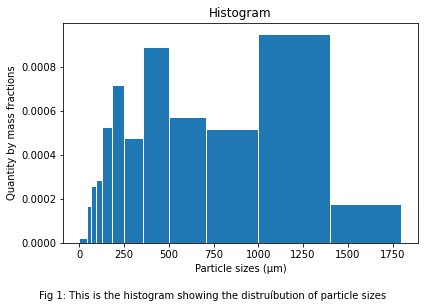

In [6]:
fig, ax = plt.subplots()
plt.bar(df2['Mesh size (μm)'], df2['$q_{r}$'], width=df2['Class width (μm)'], align='edge', edgecolor='white' )
plt.tight_layout()

ax.set_xlabel('Particle sizes (μm)')
ax.set_ylabel('Quantity by mass fractions')
ax.set_title('Histogram')
plt.figtext(0.5,-0.05, s = "Fig 1: This is the histogram showing the distruíbution of particle sizes", 
            wrap=True, horizontalalignment='center')

plt.tight_layout()

## Alternative plot of the Histogram in Semi-log scale 

In the plot above, the height of the bars represents the amount of particles in a specific size class while the width of the bar shows the size of the class width. Also it can also be seen from the plot that there is a geometric progression increase in the particle size class and this is normal in particle size analysis. However, to get an even constant bar width, which is helpful in simplifying the interpretation of the histogram, the x_axis can be set to a log scale to obtain the figure in fig 2 shown below. 

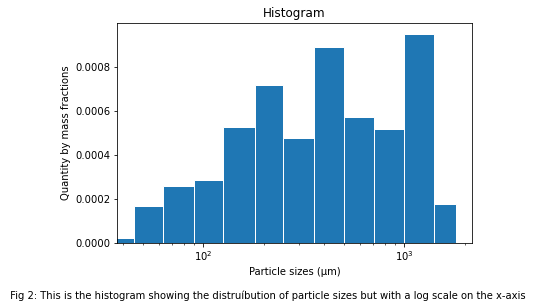

In [7]:
#plotting the histogram using semilog
fig, ax = plt.subplots()
plt.bar(df2['Mesh size (μm)'], df2['$q_{r}$'], width=df2['Class width (μm)'], align='edge', edgecolor='white')

ax.set_xlabel('Particle sizes (μm)')
ax.set_ylabel('Quantity by mass fractions')
ax.set_title('Histogram')
plt.figtext(0.5,-0.05, s = " Fig 2: This is the histogram showing the distruíbution of particle sizes but with a log scale on the x-axis", 
            wrap=True, horizontalalignment='center')

plt.tight_layout()

ax.set_xscale('log')

# Cumulative distribution

A cumulative distribution curve offers a more useful way to visualize and analyse the results. This is because it offers more precision and eliminates the imprecision from having to look at particles sizes over wide width of size classes as shown in the histogram plot. The cumulative distribution can be visualized in two ways:- 1. From the small sizes up to the bigger particles. For example, in a sieve analysis, this would be from the top of the sieve down to the bottom (Undersize) 2. It can also be viewed from the big sizes down to the smaller sizes (Oversize).
A plot of both ways should normally intersect at a point which will be the median which is 50 %  of all the value set in the analysis. Both plots yield thesame results for interpretation. The cumulative distribution function is calculated as follows:

$$ Q_{r}  = \frac{quantity\, fraction\, x_{min}...x_{i}}{total\, quantity\, x_{min}...x_{max}} $$ 

## Calculate the cumulative distribution function, $Q_{r}$

In [8]:
# Define function for calculating the cumulative distribution function (undersize)
def Qr_undersize(mass_frac):
    ''' The mass fraction from the dataframe has to be parsed into this function which then uses 
    the mass fractions to calculate the Qr undersize distribution function.
    '''
    Qr = mass_frac.cumsum()
    return Qr

In [9]:
def Qr_oversize(Under):
    ''' The undersize Qr function from the dataframe is parsed into the function and then 
    the Qr oversize function can be calculated.
    '''
    Qr = Under.apply(lambda x: 1 - x)
    return Qr

In [10]:
df3 = df.copy()
df3['Mass fraction'] = mass_fraction(df3['Mass retained (g)'])    #Calculates the mass fractions
df3['Undersize Qr'] = Qr_undersize(df3['Mass fraction'])          #Calculates the cumulative distribution function (Undersize)
df3['Oversize Qr'] = Qr_oversize(df3['Undersize Qr'])             #Calculates the cumulative distribution function (Oversize)
df3

,Mesh size (μm),Mass retained (g),Mass fraction,Undersize Qr,Oversize Qr
0,0,1.10,0.001,0.001,0.999
1,45,1.90,0.003,0.004,0.996
2,63,5.25,0.007,0.011,0.989
3,90,7.50,0.010,0.021,0.979
4,125,21.80,0.029,0.050,0.950
5,180,37.50,0.050,0.100,0.900
6,250,37.50,0.050,0.150,0.850
7,355,97.00,0.129,0.279,0.721
8,500,90.00,0.120,0.399,0.601
9,710,112.50,0.150,0.549,0.451


## Generate the cumulative distribution curve

Text(0.5, -0.05, 'Fig 3: Plot of the cumulative distribution when looking from small to large sizes(Oversize) and also from large to small (Undersize)')

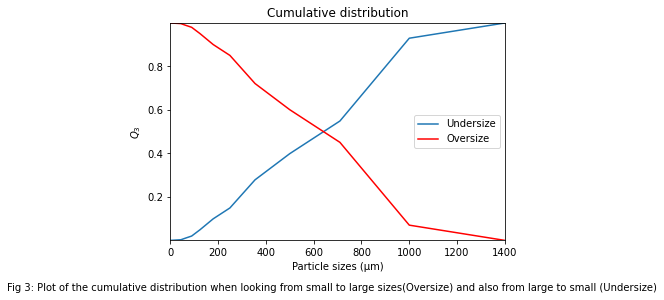

In [11]:
#Generate the plot
fig, ax = plt.subplots()
ax.plot(df3['Mesh size (μm)'], df3['Undersize Qr'])
ax.plot(df3['Mesh size (μm)'], df3['Oversize Qr'], 'r')
plt.margins(0)

plt.legend(['Undersize', 'Oversize'])
ax.set_xlabel("Particle sizes (μm)")
ax.set_ylabel("$Q_{3}$")
ax.set_title("Cumulative distribution")

plt.figtext(0.5,-0.05,
 s = "Fig 3: Plot of the cumulative distribution when looking from small to large sizes(Oversize) and also from large to small (Undersize)", 
 wrap=True, horizontalalignment='center')

The plot above represents the size distribution of the particles where the value 1.0 represents 100 % of the particle sizes. This offers precise values of quantity of particles by mass as a function of the precise values of particle sizes, thus better precision. 

# Probability density curve

The probabilty density curve is a curve of the probability density function $q_{r}$ against the mean of the mesh size intervals. The probability density function is calculated as follows:

$$ q_{r} = \frac{quantity\, fraction\, x_{min}...x_{i}}{total\, quantity\, x_{min}...x_{max} * size\, of\, the\, interval}$$

## Calculate the probability density function $q_{r}$

In [12]:
# Define the function to calculate Dmean
def mean_size(mesh):
    '''
    '''
    Dmean = mesh.rolling(2).mean().shift(-1)
    return Dmean

In [13]:
# Compute the mass fractions, class sizes and the means.
df4 = df.copy()
df4['Mass fraction'] = mass_fraction(df4['Mass retained (g)'])           #Computes the mass fractions
df4['Class width (μm)'] = class_width(df4['Mesh size (μm)']).shift(-1)   #Computes the class width
df4['Dmean (μm)'] = mean_size(df4['Mesh size (μm)'])                     #Computes the means
df4['qr_prob'] = df4['Mass fraction'] / df4['Class width (μm)']          #Computes the probability density function qr
df4

,Mesh size (μm),Mass retained (g),Mass fraction,Class width (μm),Dmean (μm),qr_prob
0,0,1.10,0.001,45.0,22.5,0.000022
1,45,1.90,0.003,18.0,54.0,0.000167
2,63,5.25,0.007,27.0,76.5,0.000259
3,90,7.50,0.010,35.0,107.5,0.000286
4,125,21.80,0.029,55.0,152.5,0.000527
5,180,37.50,0.050,70.0,215.0,0.000714
6,250,37.50,0.050,105.0,302.5,0.000476
7,355,97.00,0.129,145.0,427.5,0.000890
8,500,90.00,0.120,210.0,605.0,0.000571
9,710,112.50,0.150,290.0,855.0,0.000517


## Plotting the probability density curve

Text(0.5, -0.05, 'Fig 5: The probability density plotted as a function of the mean of each size interval Dmean')

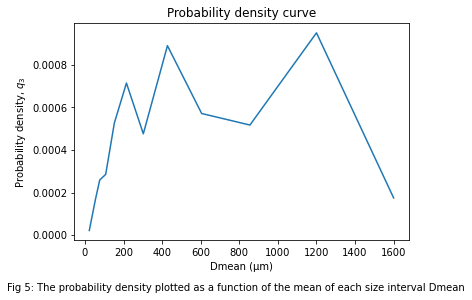

In [14]:
#Generate the plot  
fig, ax = plt.subplots()

ax.plot(df4['Dmean (μm)'], df4['qr_prob'])

ax.set_xlabel("Dmean (μm)")
ax.set_ylabel("Probability density, $q_{3}$")
ax.set_title("Probability density curve")

plt.figtext(0.5,-0.05, s = "Fig 5: The probability density plotted as a function of the mean of each size interval Dmean", 
            wrap=True, horizontalalignment='center')